In [1]:
"""
# Header ------------------------------------------------------------------
"""
import pyjags
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from core import *
from model import build
from scipy.stats import poisson
np.set_printoptions(precision=10)

## Serius

In [2]:
# data ----------------------------------------------------------

np.random.seed(123)

df = pd.read_csv("experiment1.csv")

In [3]:
models=build()

In [4]:
T = np.unique(df["Year"]).shape[0]

d15n=df.loc[ df["Year"]== 2015, ["Population"] ].values
d16n=df.loc[ df["Year"]== 2016, ["Population"] ].values

d15y=df.loc[ df["Year"]== 2015, ["Property crime"] ].values
d16y=df.loc[ df["Year"]== 2016, ["Property crime"] ].values

n=np.array([d15n, d16n]).squeeze(-1).T
y=np.array([d15y, d16y]).squeeze(-1).T

df["Regions"] = pd.Categorical(df["Regions"])
df["Year"] = pd.Categorical(df["Year"])

region = df["Regions"].cat.codes.values.reshape(-1)
year = df["Year"].cat.codes.values.reshape(-1)

nregions = np.unique(region).shape[0]
nstates = n.shape[0]

In [5]:
def eplot(model, y, n, it = 10000, chains=4,sslice =1000, debug = False):
    samples = sample(model[0], model[2], varnames=model[1], chains=chains, trials=it)
    
    #if debug:
    #    plt.hist([np.array(samples['y_pred'][:,:,-sslice,:].ravel()), 
    #    np.array(y.ravel())],bins=10,histtype='bar',density=True,label=("predicted","true"))

    #    plt.legend(loc="upper right")
    #    plt.show()
        
    y_pred = np.mean( samples['y_pred'][:,:,-sslice:,:], axis=(-1,-2) )
    theta_mean = np.mean( samples['theta'][:,:,-sslice:,:], axis=(-1,-2) )
    theta_median = np.median( samples['theta'][:,:,-sslice:,:], axis=(-1,-2) )
    
    
    loglikl_mean = np.sum(poisson.logpmf(y.ravel(),n.ravel() * theta_mean.ravel()))
    loglikl_median = np.sum(poisson.logpmf(y.ravel(),n.ravel() * theta_median.ravel()))
    
    
    y_predmean = n.ravel() * theta_mean.ravel()
    mse_mean = np.sum(((y.ravel()-y_predmean)/y.ravel())**2) 
    
    y_predmd = n.ravel() * theta_median.ravel()
    mse_md = np.sum(((y.ravel()-y_predmd)/y.ravel())**2) 
    
    aic_mean = 2* model[3] - 2 * loglikl_mean
    aic_md = 2* model[3] - 2 * loglikl_median
    sic_mean = 2* np.log(len(y.ravel()))*model[3] - 2 * loglikl_mean
    sic_md = 2* np.log(len(y.ravel()))*model[3] - 2 * loglikl_median
    
    print("######################")
    
    print("### mean: ---")
    print("Log likelihood: " + str(loglikl_mean)) 
    print("aic: "+ str(aic_mean))
    print("sic: "+ str(sic_mean))
    print("chi-square : " + str(mse_mean))
    
    print("### median: ---")
    print("Log likelihood: " + str(loglikl_median))
    print("aic: "+ str(aic_md))
    print("sic: "+ str(sic_md))
    print("chi-square : " + str(mse_md))
    
    print("### sampled: ---")
    print("mse: " + str(np.sum(((y.ravel()-y_pred.ravel())/y.ravel())**2) ) )
    
    print("######################")
    if debug:
        analyse_fit(model[1],samples)
    
    plot_predictive(
        n.ravel(),
        y.ravel(), 
        y_pred.ravel())
    
    plt.show()

# notation

## nation, region, state, time
### time - i - ar1 lin, q - ar1 quad, s - stationary 
### region, state, natio - i - independent, f - fixed effect, c - car effect, s - sar effect

adapting: iterations 2176 of 4000, elapsed 0:00:09, remaining 0:00:08
adapting: iterations 4000 of 4000, elapsed 0:00:17, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:17, remaining 0:00:00
sampling: iterations 1448 of 40000, elapsed 0:00:07, remaining 0:03:02
sampling: iterations 3580 of 40000, elapsed 0:00:16, remaining 0:02:43
sampling: iterations 4692 of 40000, elapsed 0:00:22, remaining 0:02:43
sampling: iterations 5772 of 40000, elapsed 0:00:27, remaining 0:02:42
sampling: iterations 6824 of 40000, elapsed 0:00:33, remaining 0:02:38
sampling: iterations 7872 of 40000, elapsed 0:00:39, remaining 0:02:40
sampling: iterations 8876 of 40000, elapsed 0:00:45, remaining 0:02:36
sampling: iterations 9868 of 40000, elapsed 0:00:50, remaining 0:02:32
sampling: iterations 11856 of 40000, elapsed 0:00:59, remaining 0:02:19
sampling: iterations 12864 of 40000, elapsed 0:01:05, remaining 0:02:16
sampling: iterations 14856 of 40000, elapsed 0:01:15, remaining 0:02:07
sampli

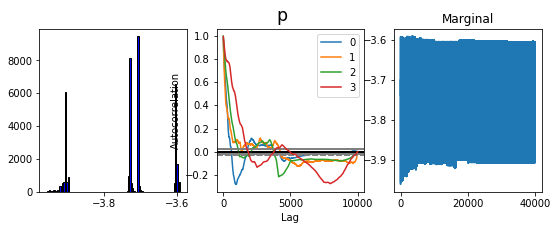

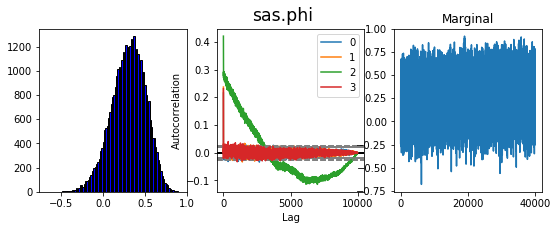

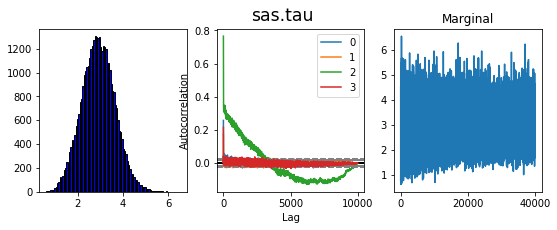

chi-square : 0.10824674134495844


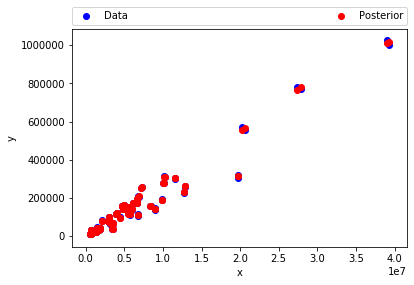

In [8]:
eplot(models["fiss"], y = y, n=n, it=10000, sslice=4000, debug=True)

adapting: iterations 2064 of 4000, elapsed 0:00:10, remaining 0:00:10
adapting: iterations 4000 of 4000, elapsed 0:00:19, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:19, remaining 0:00:00
sampling: iterations 1340 of 40000, elapsed 0:00:06, remaining 0:02:41
sampling: iterations 3748 of 40000, elapsed 0:00:17, remaining 0:02:45
sampling: iterations 5964 of 40000, elapsed 0:00:27, remaining 0:02:34
sampling: iterations 8176 of 40000, elapsed 0:00:36, remaining 0:02:22
sampling: iterations 9296 of 40000, elapsed 0:00:42, remaining 0:02:18
sampling: iterations 10408 of 40000, elapsed 0:00:47, remaining 0:02:13
sampling: iterations 11516 of 40000, elapsed 0:00:52, remaining 0:02:10
sampling: iterations 13724 of 40000, elapsed 0:01:01, remaining 0:01:58
sampling: iterations 15960 of 40000, elapsed 0:01:11, remaining 0:01:47
sampling: iterations 18220 of 40000, elapsed 0:01:20, remaining 0:01:35
sampling: iterations 20504 of 40000, elapsed 0:01:29, remaining 0:01:25
sam

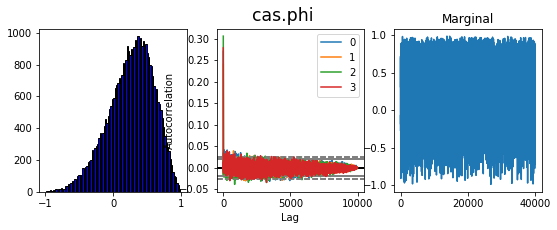

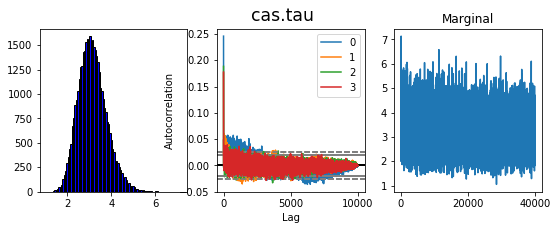

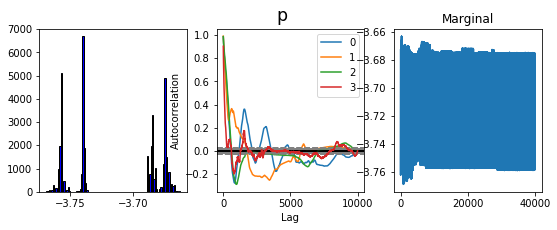

chi-square : 0.13054773953025586


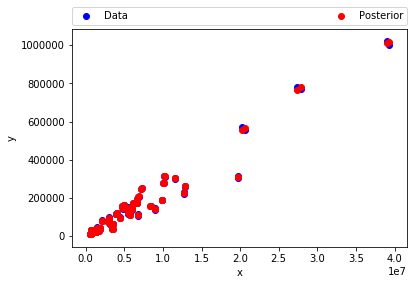

In [9]:
eplot(models["fics"], y = y, n=n, it=10000, sslice=4000, debug=True)

adapting: iterations 2060 of 4000, elapsed 0:00:09, remaining 0:00:09
adapting: iterations 4000 of 4000, elapsed 0:00:18, remaining 0:00:00
adapting: iterations 4000 of 4000, elapsed 0:00:18, remaining 0:00:00
sampling: iterations 2088 of 40000, elapsed 0:00:10, remaining 0:02:54
sampling: iterations 4264 of 40000, elapsed 0:00:20, remaining 0:02:50
sampling: iterations 6364 of 40000, elapsed 0:00:30, remaining 0:02:40
sampling: iterations 8460 of 40000, elapsed 0:00:41, remaining 0:02:31
sampling: iterations 10540 of 40000, elapsed 0:00:50, remaining 0:02:19
sampling: iterations 12664 of 40000, elapsed 0:00:59, remaining 0:02:08
sampling: iterations 14808 of 40000, elapsed 0:01:09, remaining 0:01:57
sampling: iterations 16964 of 40000, elapsed 0:01:19, remaining 0:01:47
sampling: iterations 18040 of 40000, elapsed 0:01:24, remaining 0:01:42
sampling: iterations 19108 of 40000, elapsed 0:01:30, remaining 0:01:38
sampling: iterations 21240 of 40000, elapsed 0:01:39, remaining 0:01:27
sa

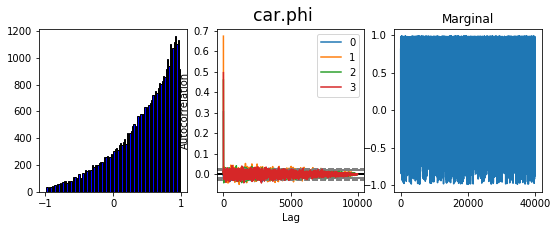

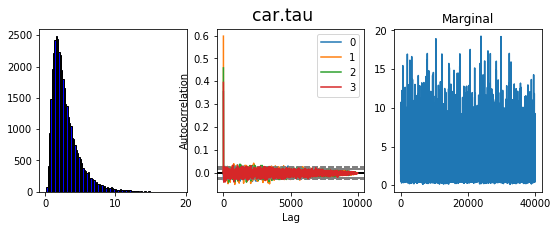

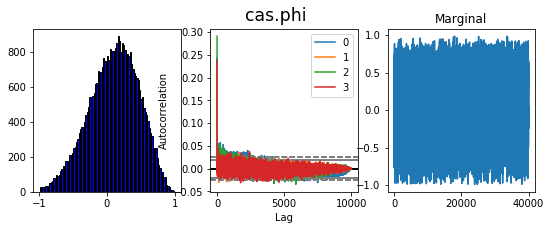

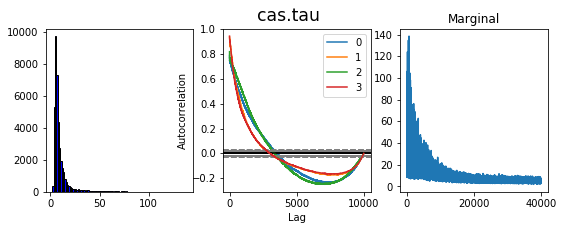

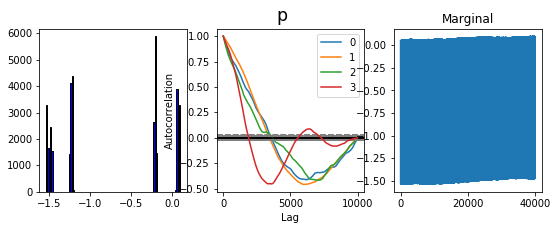

chi-square : 0.8785228699881361


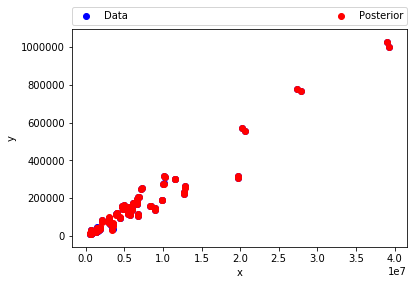

In [6]:
eplot(models["bfccl"], y = y, n=n, it=10000, sslice=4000, debug=True)

## Model

$C_{it}$ is the criminal population for a given state $i$ in year $t$.


$ C_{it} \propto Bin( d_{it} , n_{it})$

$ d_{ij} = \gamma_{it} + \gamma_{i}$

$ \gamma_{it} = \beta_0 + \beta_1\epsilon c_{it-1}$

$ \epsilon c_{eit-1} = C_{it-1} - E[C_{it-1}]$

$\gamma_{i} = d_0 + \mu_i + \alpha_{r(i)}$

$Y_{it}$ is the property crime for a given state $i$ in year $t$

$ Y_{it} \propto Poisson( C_{it} p_{it})$

$ p_{ij} = \tau_{it} + \tau_{i}$

$ \tau_{it} = \beta'_0 + \beta'_1\epsilon y_{it-1}$

$ \epsilon y_{eit-1} = C_{it-1} - E[C_{it-1}]$

$\tau_{i} = p_0 + \pi_i + \alpha' _{r(i)}$

## Prior


In [69]:
model = models["fcfl"]
samples = sample(model[0], model[2], varnames=model[1], chains=4, trials=10000)

adapting: iterations 4000 of 4000, elapsed 0:00:03, remaining 0:00:00
sampling: iterations 13900 of 40000, elapsed 0:00:09, remaining 0:00:17
sampling: iterations 29216 of 40000, elapsed 0:00:19, remaining 0:00:07
sampling: iterations 36900 of 40000, elapsed 0:00:24, remaining 0:00:02
sampling: iterations 40000 of 40000, elapsed 0:00:26, remaining 0:00:00


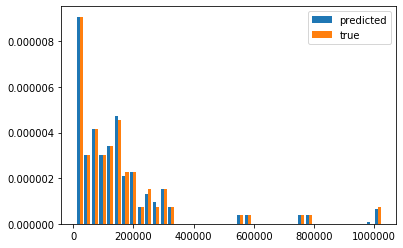

In [70]:

plt.hist([np.array(samples['y_pred'][:,:,-4000,:].ravel()), 
        np.array(y.ravel())],bins=40,histtype='bar',density=True,label=("predicted","true"))

plt.legend(loc="upper right")
plt.show()